# Importing the libraries

In [4]:
import pandas as pd 
from glob import glob 
import statistics 
Bearing1_1 = sorted(glob(r'C:/Users/ronit/Desktop/FEMTODataSet/Learning_set/Bearing1_1/acc_*.csv')) #Trainingsdaten
Bearing1_3 = sorted(glob(r'C:/Users/ronit/Desktop/FEMTODataSet/Learning_set/Bearing1_3/acc_*.csv')) #Testdaten
all_files = [] # Speichert alle Pfade des Ordners in der Tabelle all_files 
#Trainingsdaten

# Reading the files and Preprocessing

In [5]:
for d in Bearing1_3:
    Testdaten1_3 = pd.read_csv(d, header = None, delimiter = ',')     
    Testdaten1_3.columns =['hour', 'minute', 'second', 'μ-second', 'Horizontal Acceleration', 'Vertical Acceleration'] #Angeben der Spaltennamen
    import numpy as np     
    ax= np.power(Testdaten1_3['Horizontal Acceleration'],2)     
    ay= np.power(Testdaten1_3['Vertical Acceleration'],2)     
    Testdaten1_3['acceleration']= np.sqrt(ax+ay)
    Testdaten1_3['avg_acceleration'] = np.mean(Testdaten1_3 ['acceleration'])
    del Testdaten1_3['Horizontal Acceleration']
    del Testdaten1_3['Vertical Acceleration']
    del Testdaten1_3['acceleration']
    del Testdaten1_3['μ-second']
    Testdaten1_3 = Testdaten1_3.drop_duplicates("avg_acceleration", keep='first') #Beseitigen der 2559 Duplikate je Datensatz 
    all_files.append(Testdaten1_3)

In [6]:
Testdaten1_3 = pd.concat(all_files, ignore_index=True) #Concat erstellt neues Dataframe mit neuem Index

In [7]:
Testdaten1_3

,hour,minute,second,avg_acceleration
0,8,33,1,0.449219
1,8,33,11,0.433749
2,8,33,21,0.426958
3,8,33,31,0.419624
4,8,33,41,0.439901
...,...,...,...,...
1797,13,32,31,1.152225
1798,13,32,41,0.815346
1799,13,32,51,1.332254
1800,13,33,1,2.848928


In [8]:
for f in Bearing1_1: # Beginn der For- Schleife um alle acc.csv Dateien zu lesen    
    Trainingsdaten1_1 = pd.read_csv(f, header = None, delimiter = ',')     
    Trainingsdaten1_1.columns =['hour', 'minute', 'second', 'μ-second', 'Horizontal Acceleration', 'Vertical Acceleration'] #Angeben der Spaltennamen
    import numpy as np     
    ax= np.power(Trainingsdaten1_1['Horizontal Acceleration'],2)     
    ay= np.power(Trainingsdaten1_1['Vertical Acceleration'],2)     
    Trainingsdaten1_1['acceleration']= np.sqrt(ax+ay)
    Trainingsdaten1_1['avg_acceleration'] = np.mean(Trainingsdaten1_1 ['acceleration'])
    del Trainingsdaten1_1['Horizontal Acceleration']
    del Trainingsdaten1_1['Vertical Acceleration']
    del Trainingsdaten1_1['acceleration']
    del Trainingsdaten1_1['μ-second']
    Trainingsdaten1_1 = Trainingsdaten1_1.drop_duplicates("avg_acceleration", keep='first') #Beseitigen der 2559 Duplikate je Datensatz                    
    all_files.append(Trainingsdaten1_1)    #Mit Append werden alle Daten aneinandergehängt 

In [9]:
Trainingsdaten1_1 = pd.concat(all_files, ignore_index=True) #Concat erstellt neues Dataframe mit neuem Index

In [10]:
Trainingsdaten1_1

,hour,minute,second,avg_acceleration
0,8,33,1,0.449219
1,8,33,11,0.433749
2,8,33,21,0.426958
3,8,33,31,0.419624
4,8,33,41,0.439901
...,...,...,...,...
4600,17,25,59,5.609605
4601,17,26,9,4.666145
4602,17,26,19,4.964347
4603,17,26,29,5.303595


In [11]:
daten = Trainingsdaten1_1.drop_duplicates("avg_acceleration", keep='first') #Beseitigen der 2559 Duplikate je Datensatz                    

In [12]:
daten

,hour,minute,second,avg_acceleration
0,8,33,1,0.449219
1,8,33,11,0.433749
2,8,33,21,0.426958
3,8,33,31,0.419624
4,8,33,41,0.439901
...,...,...,...,...
4600,17,25,59,5.609605
4601,17,26,9,4.666145
4602,17,26,19,4.964347
4603,17,26,29,5.303595


In [13]:
dataset = pd.read_csv(r'C:\Users\sezen\Desktop\avgacc.csv')

dataset.columns = ['Number', 'Hour', 'Minute', 'Second', 'Average acceleration']
dataset

,Number,Hour,Minute,Second,Average acceleration
0,2.0,8.0,33.0,11.0,0.433749
1,3.0,8.0,33.0,21.0,0.426958
2,4.0,8.0,33.0,31.0,0.419624
3,5.0,8.0,33.0,41.0,0.439901
4,6.0,8.0,33.0,51.0,0.437529
...,...,...,...,...,...
4599,4601.0,17.0,25.0,59.0,5.609605
4600,4602.0,17.0,26.0,9.0,4.666145
4601,4603.0,17.0,26.0,19.0,4.964347
4602,4604.0,17.0,26.0,29.0,5.303595


In [14]:
dataset2 = dataset.iloc[:,[0, 4]]
dataset2

,Number,Average acceleration
0,2.0,0.433749
1,3.0,0.426958
2,4.0,0.419624
3,5.0,0.439901
4,6.0,0.437529
...,...,...
4599,4601.0,5.609605
4600,4602.0,4.666145
4601,4603.0,4.964347
4602,4604.0,5.303595


In [15]:
# Building an array

arr = np.arange(1, 4606, 1)
print(arr.shape)
arr

(4605,)


array([   1,    2,    3, ..., 4603, 4604, 4605])

In [16]:
# Converting 1-D array into 2-D array
# Combining array arr and daten

daten2 = np.column_stack((arr, daten))

print(daten2.shape)
daten2

(4605, 5)


array([[1.00000000e+00, 8.00000000e+00, 3.30000000e+01, 1.00000000e+00,
        4.49218955e-01],
       [2.00000000e+00, 8.00000000e+00, 3.30000000e+01, 1.10000000e+01,
        4.33749491e-01],
       [3.00000000e+00, 8.00000000e+00, 3.30000000e+01, 2.10000000e+01,
        4.26958437e-01],
       ...,
       [4.60300000e+03, 1.70000000e+01, 2.60000000e+01, 1.90000000e+01,
        4.96434674e+00],
       [4.60400000e+03, 1.70000000e+01, 2.60000000e+01, 2.90000000e+01,
        5.30359527e+00],
       [4.60500000e+03, 1.70000000e+01, 2.60000000e+01, 3.90000000e+01,
        5.60176161e+00]])

In [17]:
# Save Numpy array to csv

np.savetxt('avgacc.csv', daten2, delimiter=',')

In [18]:
x = daten[['hour', 'minute','second','avg_acceleration']]
y = daten2 #array Form
y=y.astype(int)

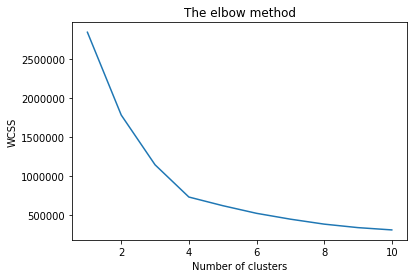

In [19]:
#Elbow Method
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Applying KMeans

In [20]:
#k means clustering
# Centroid Vektoren

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(dataset2)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.87750000e+03 4.75158528e-01]
 [5.79500000e+02 4.46725394e-01]
 [4.02800000e+03 1.00072867e+00]
 [1.73100000e+03 5.85390392e-01]]


# Visualising the Centroids

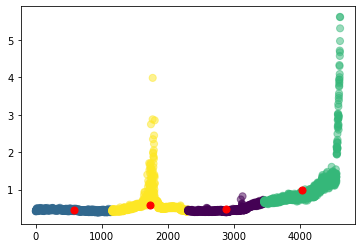

In [21]:
#K means Plotting

plt.scatter(dataset2['Number'], dataset2['Average acceleration'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

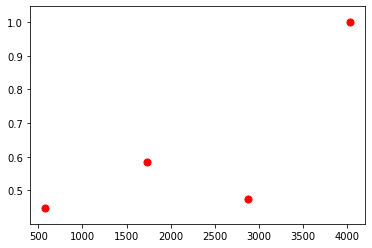

In [22]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [23]:
acc1 = Trainingsdaten1_1.iloc[:,[0]]
kmeans = KMeans(n_clusters=4)
kmeans.fit(acc1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
target = kmeans.predict(acc1)
centroids = kmeans.cluster_centers_

In [25]:
Trainingsdaten1_1['class'] = target

In [ ]:
#print (Trainingsdaten1_1.to_string())

In [27]:
x_train= Trainingsdaten1_1.iloc[:, [0,1,2,3]]

In [28]:
x_train

,hour,minute,second,avg_acceleration
0,8,33,1,0.449219
1,8,33,11,0.433749
2,8,33,21,0.426958
3,8,33,31,0.419624
4,8,33,41,0.439901
...,...,...,...,...
4600,17,25,59,5.609605
4601,17,26,9,4.666145
4602,17,26,19,4.964347
4603,17,26,29,5.303595


In [29]:
y_train = Trainingsdaten1_1.iloc[:, [4]]

In [30]:
y_train

,class
0,1
1,1
2,1
3,1
4,1
...,...
4600,2
4601,2
4602,2
4603,2


In [31]:
# Testdaten 
acc2 = Testdaten1_3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(acc2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
test_target = kmeans.predict(acc2)
centroids = kmeans.cluster_centers_

In [33]:
Testdaten1_3['class'] = test_target

In [ ]:
#print(Testdaten1_3.to_string())

In [250]:
x_test = Testdaten1_3.iloc[:, [0,1,2,3]]

In [251]:
x_test

,hour,minute,second,avg_acceleration
0,8,33,1,0.449219
1,8,33,11,0.433749
2,8,33,21,0.426958
3,8,33,31,0.419624
4,8,33,41,0.439901
...,...,...,...,...
1797,13,32,31,1.152225
1798,13,32,41,0.815346
1799,13,32,51,1.332254
1800,13,33,1,2.848928


In [252]:
y_test = Testdaten1_3.iloc[:, [4]]

In [253]:
y_test

,class
0,0
1,0
2,0
3,2
4,2
...,...
1797,2
1798,2
1799,2
1800,0


# Applying Support Vector Machine

In [ ]:

from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)

In [268]:
y_pred = clf.predict(x_test)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24972253052164262


In [269]:
Accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(Accuracy))

Test Accuracy of SVM Algorithm: 24.97%
